# Crop, flip, and paste array

This notebook demonstrate how to do `crop`, `paste`, `flip` operation on arrays with pyclesperanto library, and more globaly how to manipulate arrays.

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

cle.select_device(1, "gpu") # default initialisation 

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.274.02
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Local Memory Size:           0 MB
	Maximum Buffer Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Get an example data to process

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], shape=(254, 256), dtype=uint8, mtype=buffer)
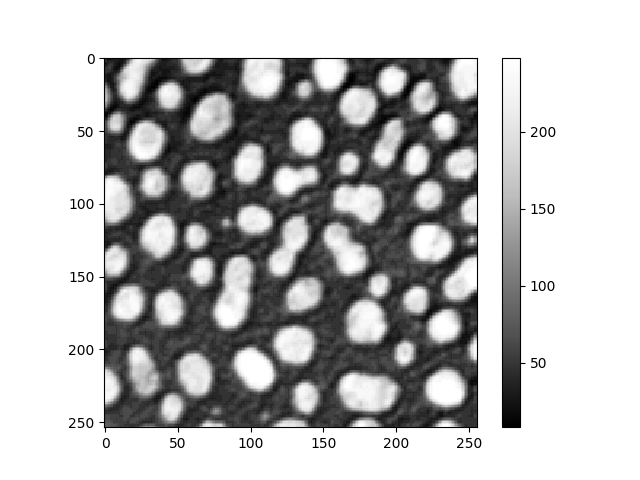
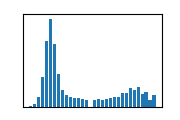

In [2]:
image = cle.push(imread('https://samples.fiji.sc/blobs.png').squeeze())
image

## `crop` data from an image

`crop` take an input array and the area to crop is defined by an origin coordinate `(x,y,z)` and a region size `(w,h,d)`.
It will return a new array of shape `(w,h,d)`.

In [3]:
cle.crop?

Signature:
cle.crop(
    input_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array],
    output_image: Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array, NoneType] = None,
    start_x: int = 0,
    start_y: int = 0,
    start_z: int = 0,
    width: int = 1,
    height: int = 1,
    depth: int = 1,
    device: Optional[pyclesperanto._pyclesperanto._Device] = None,
) -> Union[numpy.ndarray, pyclesperanto._pyclesperanto._Array]
Docstring:
Crops a given substack out of a given image stack. Note: If the destination
image already exists, it will be overwritten and keep its dimensions.

Parameters
----------
input_image: Image
    Input image to process.
output_image: Optional[Image] (= None)
    Output result image.
start_x: int (= 0)
    Starting index coordinate x.
start_y: int (= 0)
    Starting index coordinate y.
start_z: int (= 0)
    Starting index coordinate z.
width: int (= 1)
    Width size of the region to crop.
height: int (= 1)
    Height size of the region to

Let's crop at a square of `75x75` pixel, at (`x=10`, `y=10`) origin coordinate

array([[ 64, 104, 136, ...,  32,  40,  40],
       [ 88, 112, 144, ...,  32,  40,  40],
       [104, 128, 144, ...,  32,  40,  40],
       ...,
       [112,  96,  72, ...,  32,  40,  40],
       [144, 120,  96, ...,  40,  48,  48],
       [168, 144, 120, ...,  48,  56,  56]], shape=(75, 75), dtype=uint8, mtype=buffer)
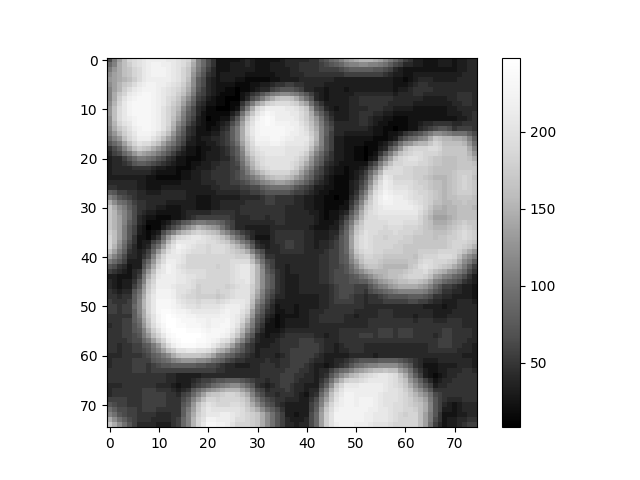
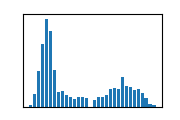

In [4]:
width, height = 75, 75
x, y = 10, 10
tile = cle.crop(image, start_x=x, start_y=y, width=width, height=height)
tile

## `paste` data to an image

Now that we have a tile, we can use it to create a new image of the same data type than our tile. Like that we will be able to past our tile in this new image.
Let's start by creating an empty image, and fill it will some background value.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(156, 156), dtype=uint8, mtype=buffer)
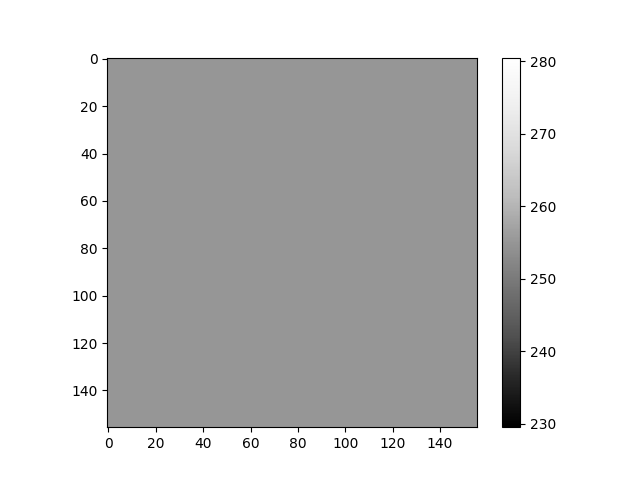
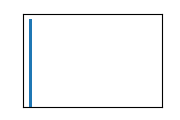

In [5]:
collage = cle.create((width * 2 + 6, height * 2 + 6), dtype=tile.dtype)
collage.fill(255) # "white" background, 255 is the max value accepted by uint8 dtype
collage

We can now paste our tile in the our `collage` image. Same as for the `crop`, we can look at the documentation for parameters and usage. 
Here, we will paste our tile on the top-left corner, keeping a few pixel border for the display.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  64, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(156, 156), dtype=uint8, mtype=buffer)
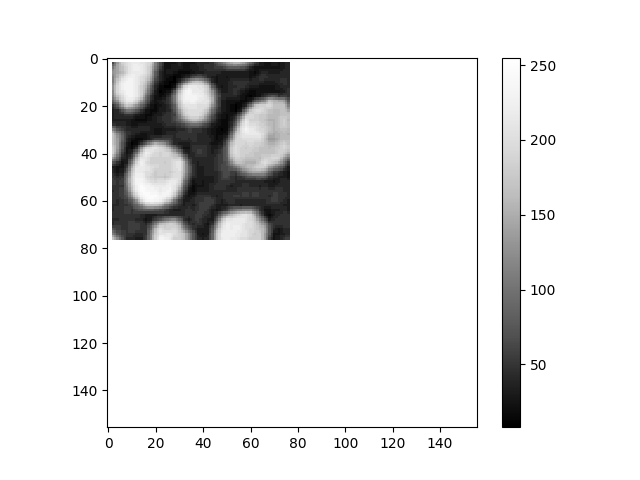
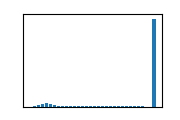

In [6]:
cle.paste(tile, collage, 2, 2)
collage

## `flip` data

We still have a lot of space in our collage data. We can then also apply various symmetry operation to modify the tile before pasting it. We are using the `flip` function to do so, and then paste the results in the top-right corner of our collage.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  64, ...,  64, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(156, 156), dtype=uint8, mtype=buffer)
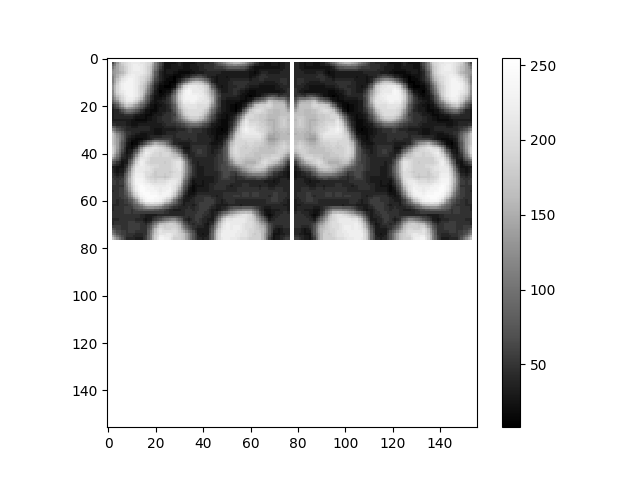
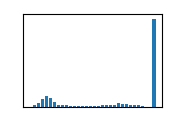

In [7]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=False)
cle.paste(flipped_tile, collage, width + 4, 2)
collage

We do the same, with the two bottom corner to complete our little collage example.

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  64, ...,  64, 255, 255],
       ...,
       [255, 255, 255, ...,  64, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(156, 156), dtype=uint8, mtype=buffer)
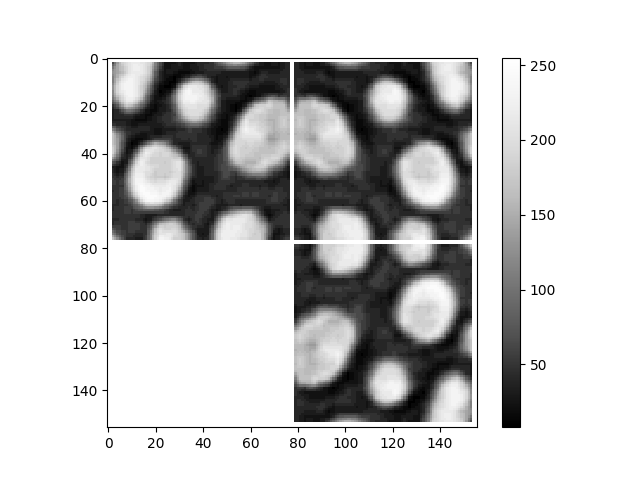
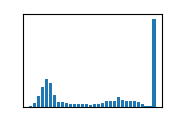

In [8]:
flipped_tile = cle.flip(tile, flip_x=True, flip_y=True)
cle.paste(flipped_tile, collage, width + 4, height + 4)
collage

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255,  64, ...,  64, 255, 255],
       ...,
       [255, 255,  64, ...,  64, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], shape=(156, 156), dtype=uint8, mtype=buffer)
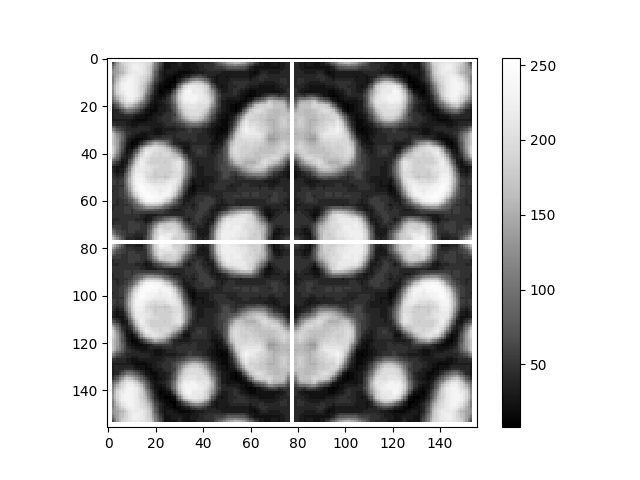
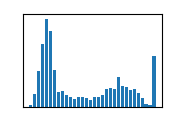

In [9]:
flipped_tile = cle.flip(tile, flip_x=False, flip_y=True)
cle.paste(flipped_tile, collage, 2, height + 4)
collage

## `slicing` data

Slicing means taking elements from one given index to another given index using the operatos `[]` as follow: `array[start:end:step]`

It is possible to crop arrays:

array([[ 64, 104, 136, ...,  32,  40,  40],
       [ 88, 112, 144, ...,  32,  40,  40],
       [104, 128, 144, ...,  32,  40,  40],
       ...,
       [112,  96,  72, ...,  32,  40,  40],
       [144, 120,  96, ...,  40,  48,  48],
       [168, 144, 120, ...,  48,  56,  56]], shape=(75, 75), dtype=uint8, mtype=buffer)
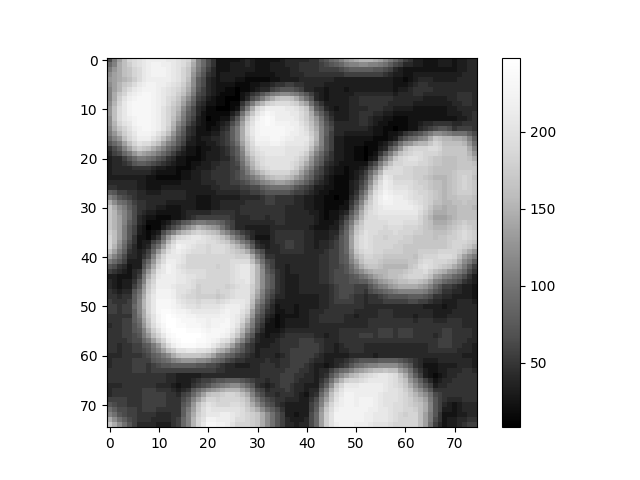
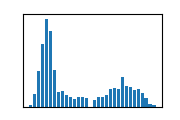

In [10]:
width, height = 75, 75
x, y = 10, 10
image[x:x+width, y:y+height]

Or write specific value in a subregion of the array

array([[ 40,  32,  24, ..., 216, 200, 200],
       [ 56,  40,  24, ..., 232, 216, 216],
       [ 64,  48,  24, ..., 240, 232, 232],
       ...,
       [ 72,  80,  80, ...,  48,  48,  48],
       [ 80,  80,  80, ...,  48,  48,  48],
       [ 96,  88,  80, ...,  48,  48,  48]], shape=(254, 256), dtype=uint8, mtype=buffer)
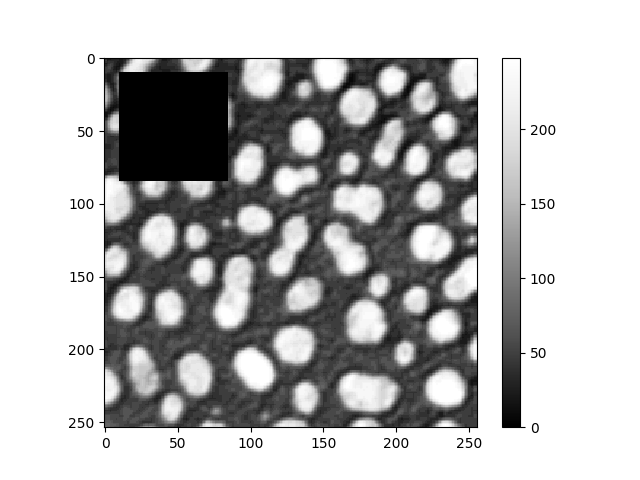
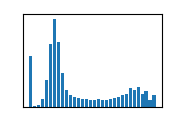

In [14]:
width, height = 75, 75
x, y = 10, 10
image[x:x+width, y:y+height] = 0
image

It is also possible retrieve only 1 element every x element of the array, for example to reduce scale:

array([[ 40,  24,  24, ...,  64, 216, 240],
       [ 24,  48,  16, ..., 168, 248, 240],
       [ 48,  32,   0, ..., 208, 224, 232],
       ...,
       [224, 168,  48, ..., 240, 160,  32],
       [ 72,  48,  40, ...,  72,  40,  48],
       [ 48,  56,  48, ...,  40,  56,  48]], shape=(50, 51), dtype=uint8, mtype=buffer)
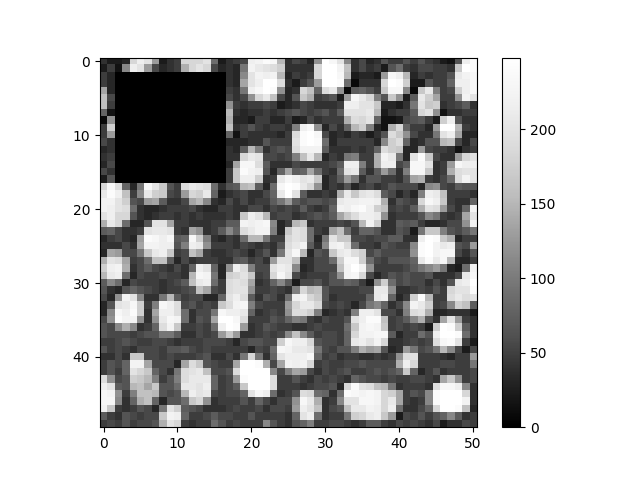
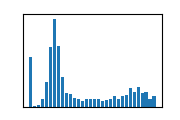

In [15]:
image[::5,::5]

__IMPORTANT:__ While slicing is usefull, thte current implementation might be less efficient than using the `crop()` or `paste()` function.